In [4]:
import logging
# import sys
# import time
# import torch

from main import load_default_config, parse_shell_args, plot_single, run_energy_model_mnist
from lib import config
from lib.exp.varyingdatapoints import run_exp as vd_run_exp, read_N_plot_exp_data as vd_read_exp_data, read_N_plot_multi_exp_data

In [5]:
logging.getLogger('matplotlib.font_manager').disabled = True
%config InlineBackend.figure_format = 'retina'

In [8]:
def ipynb_main(_argv, exp):
	# Parse shell arguments as input configuration
	user_config = parse_shell_args(_argv[1:])

	# Load default parameter configuration from file for the specified energy-based model
	cfg = load_default_config(user_config["energy"])

	# Overwrite default parameters with user configuration where applicable
	cfg.update(user_config)

	# Setup global logger and logging directory
	config.setup_logging(cfg["energy"] if cfg["energy"] else "bp" + "_" + cfg["c_energy"] + "_" + cfg["dataset"],
						dir=cfg['log_dir'])
	logging.info(f"Cmd: python {' '.join(_argv)}")
	logging.info(f"Device:\n{config.device}")
	# Run the script using the created parameter configuration
	exp(cfg)
	# Close logging
	# logging.info('log file is open')
	_log_file_name = config.get_log_name()
	# https://stackoverflow.com/a/61457520/8612123
	logger = logging.getLogger()
	while logger.hasHandlers():
		logger.removeHandler(logger.handlers[0])
	logging.shutdown()

	# logging.info('log file should be closed')
	# Return name for log to re-use in plotting function
	return _log_file_name

In [21]:
_cmd = 'python main.py --c_energy cross_entropy --seed 2019 --epochs 2' # Run MLP with BP
log_file_name = ipynb_main(_argv=_cmd.split(' ')[1:], exp=lambda _: None)
print(log_file_name)

[INFO  2024/07/20 - 19:09:12(UTC)] Cmd: python main.py --c_energy cross_entropy --seed 2019 --epochs 2
[INFO  2024/07/20 - 19:09:12(UTC)] Device:
cuda:0


20240720_1909_bp_cross_entropy_mnist


# Train a single model

## MLP with BP

In [4]:
_cmd = 'python main.py --c_energy cross_entropy --seed 2019 --epochs 2 --summary-writer' # Run MLP with BP
log_file_name = ipynb_main(_argv=_cmd.split(' ')[1:], exp=run_energy_model_mnist)
print(log_file_name)

[INFO  2024/07/20 - 19:53:32(UTC)] Cmd: python main.py --c_energy cross_entropy --seed 2019 --epochs 2 --summary-writer
[INFO  2024/07/20 - 19:53:32(UTC)] Device:
cuda:0
[INFO  2024/07/20 - 19:53:32(UTC)] Device:
cuda:0
[INFO  2024/07/20 - 19:53:32(UTC)] Start training with parametrization:
{
    "batch_size": 100,
    "beta": 1,
    "c_energy": "cross_entropy",
    "dataset": "mnist",
    "dimensions": [
        784,
        1000,
        10
    ],
    "early_stopping": false,
    "energy": null,
    "epochs": 2,
    "learning_rate": 0.001,
    "log_dir": "",
    "nonlinearity": "sigmoid",
    "optimizer": "adam",
    "seed": 2019,
    "summary_writer": true
}
[INFO  2024/07/20 - 19:53:32(UTC)] [0/54000 (0%)]	Loss: 2.297348
[INFO  2024/07/20 - 19:53:33(UTC)] [5400/54000 (10%)]	Loss: 1.566249
[INFO  2024/07/20 - 19:53:34(UTC)] [10800/54000 (20%)]	Loss: 1.556063
[INFO  2024/07/20 - 19:53:36(UTC)] [16200/54000 (30%)]	Loss: 1.599178
[INFO  2024/07/20 - 19:53:37(UTC)] [21600/54000 (40%)]	L

20240720_1953_bp_cross_entropy_mnist


Plot result of the single training run (all captured metrics) that you ran in the cell above

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


<Figure size 800x600 with 0 Axes>

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substitutin

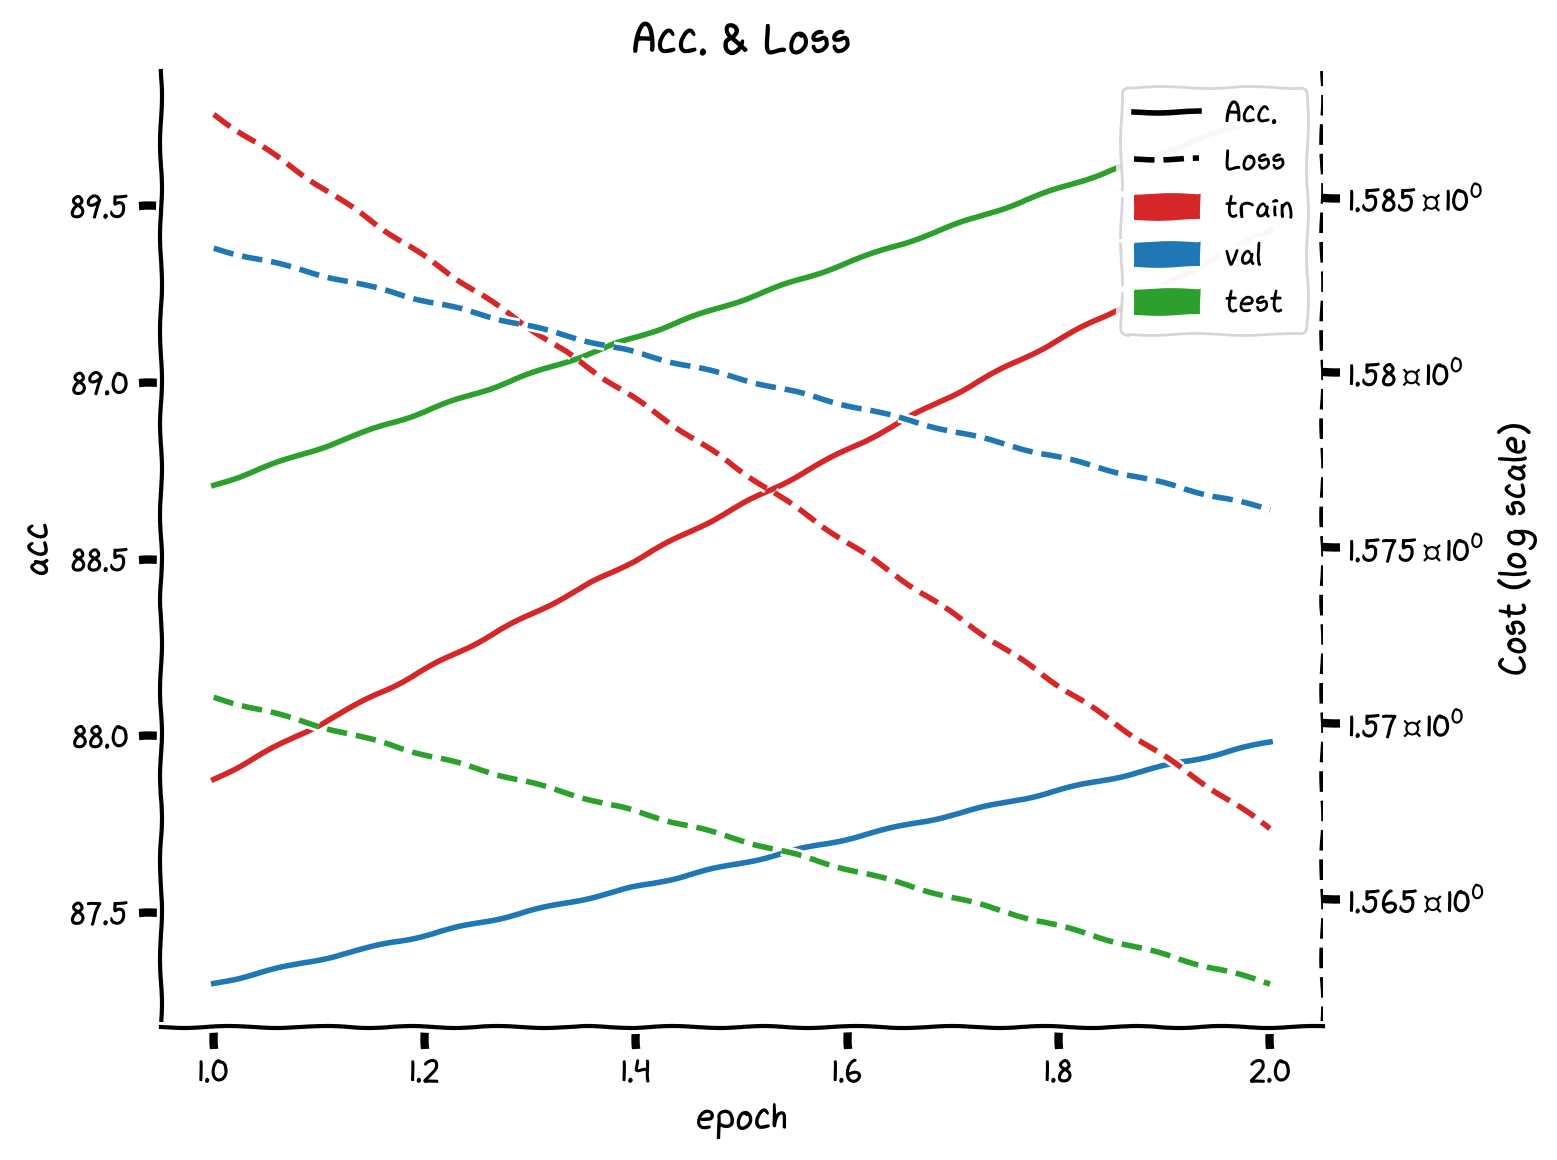

In [6]:
# log_file_name = '20240720_1953_bp_cross_entropy_mnist'
plot_single(log_file_name, _show=True, _save=False)

## EP

## For `cond_gaussian`

Run `cond_gaussian` energy model training

In [9]:
_cmd = 'python main.py --energy cond_gaussian --c_energy cross_entropy --seed 2019 --epochs 2 --summary-writer'
log_file_name = ipynb_main(_argv=_cmd.split(' ')[1:], exp=run_energy_model_mnist)
print(log_file_name)

[INFO  2024/07/23 - 02:23:20(UTC)] Cmd: python main.py --energy cond_gaussian --c_energy cross_entropy --seed 2019 --epochs 2 --summary-writer
[INFO  2024/07/23 - 02:23:20(UTC)] Device:
cpu
[INFO  2024/07/23 - 02:23:20(UTC)] Device:
cpu
[INFO  2024/07/23 - 02:23:20(UTC)] Start training with parametrization:
{
    "batch_size": 100,
    "beta": 1,
    "c_energy": "cross_entropy",
    "dataset": "mnist",
    "dimensions": [
        784,
        1000,
        10
    ],
    "dynamics": {
        "dt": 0.1,
        "n_relax": 50,
        "tau": 1,
        "tol": 0
    },
    "early_stopping": false,
    "energy": "cond_gaussian",
    "epochs": 2,
    "fast_ff_init": true,
    "learning_rate": 0.001,
    "log_dir": "",
    "nonlinearity": "sigmoid",
    "optimizer": "adam",
    "seed": 2019,
    "summary_writer": true
}
[INFO  2024/07/23 - 02:23:20(UTC)] 0%:	E: 0.00	dE -21.64	batch_acc 0.3300
[INFO  2024/07/23 - 02:23:33(UTC)] 10%:	E: 0.00	dE -5.42	batch_acc 0.8300
[INFO  2024/07/23 - 02:23:

KeyboardInterrupt: 

Plot result of the single training run (all captured metrics) that you ran in the cell above

/root/neuroAI-project/lib/plot/plot.py:47: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


<Figure size 800x600 with 0 Axes>

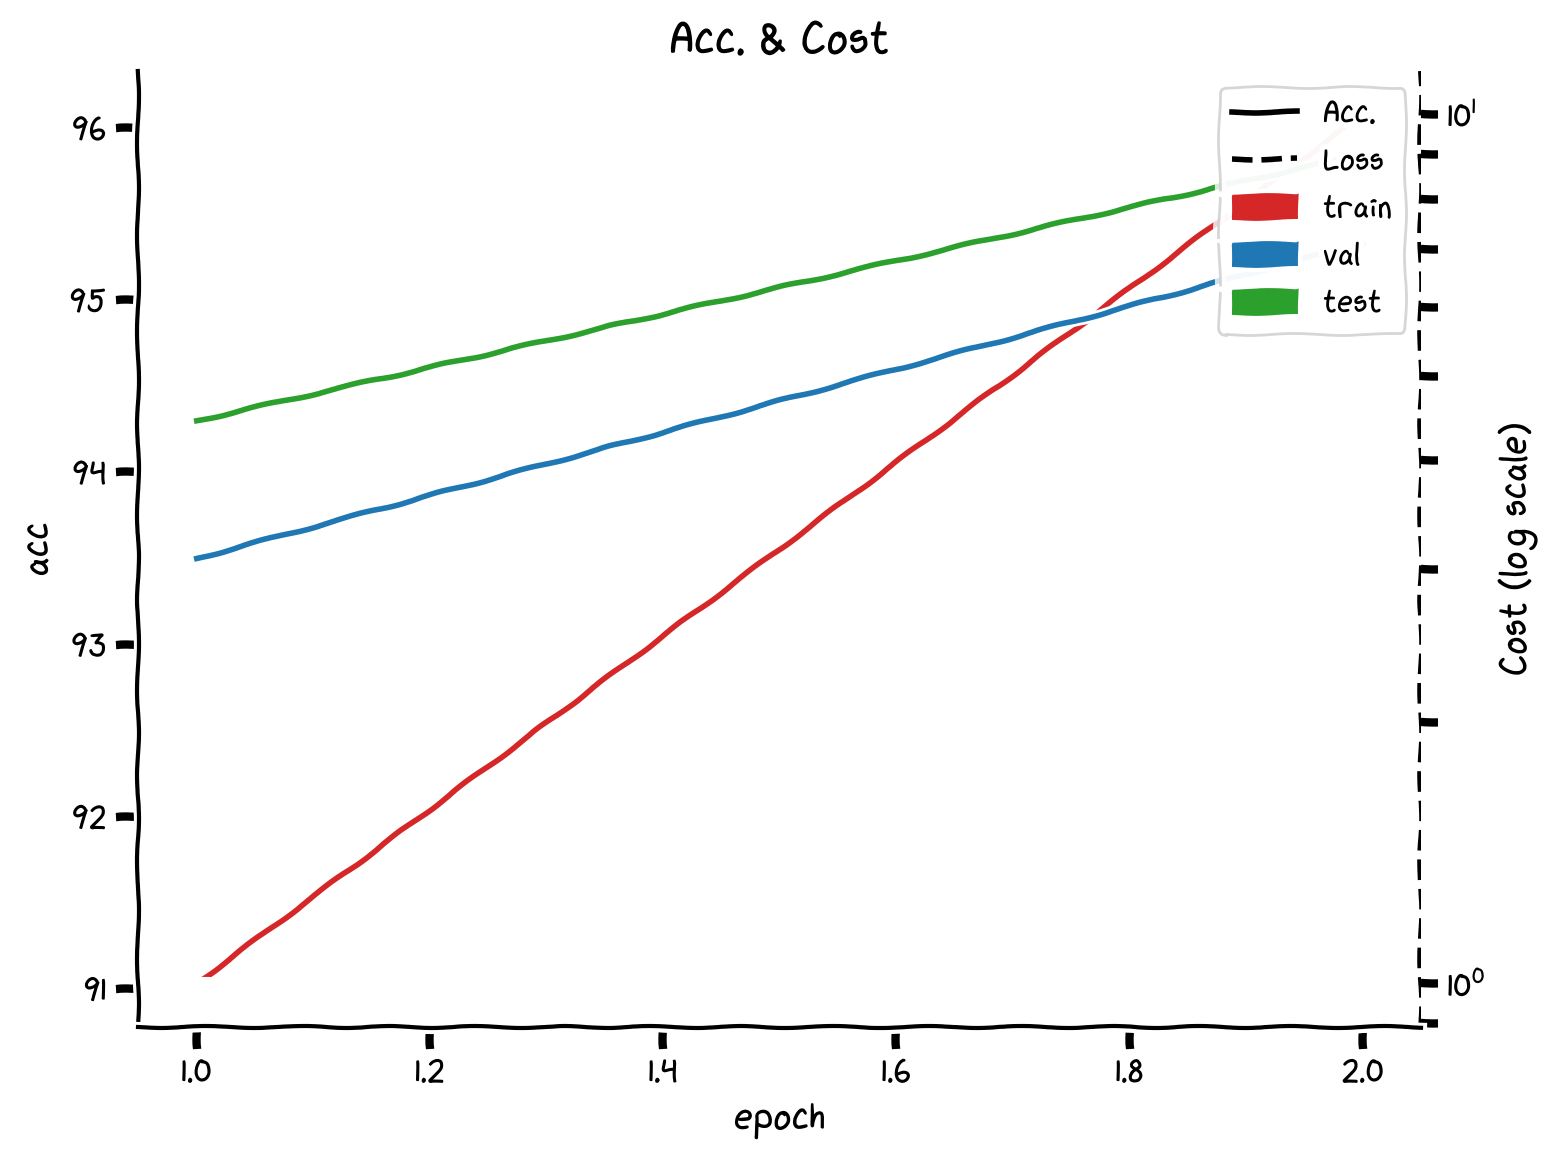

In [6]:
# log_file_name = ''
plot_single(log_file_name, _show=True, _save=False)

## For `restr_hopfield`

Run `restr_hopfield` energy model training

In [4]:
_cmd = 'python main.py --energy restr_hopfield --c_energy cross_entropy --seed 2019 --epochs 2 --summary-writer'
log_file_name = ipynb_main(_argv=_cmd.split(' ')[1:], exp=run_energy_model_mnist)
print(log_file_name)

[INFO  2024/07/20 - 20:48:30(UTC)] Cmd: python main.py --energy restr_hopfield --c_energy cross_entropy --seed 2019 --epochs 2 --summary-writer
[INFO  2024/07/20 - 20:48:30(UTC)] Device:
cuda:0
[INFO  2024/07/20 - 20:48:30(UTC)] Device:
cuda:0
[INFO  2024/07/20 - 20:48:31(UTC)] Start training with parametrization:
{
    "batch_size": 100,
    "beta": 1,
    "c_energy": "cross_entropy",
    "dataset": "mnist",
    "dimensions": [
        784,
        1000,
        10
    ],
    "dynamics": {
        "dt": 0.1,
        "n_relax": 50,
        "tau": 1,
        "tol": 0
    },
    "early_stopping": false,
    "energy": "restr_hopfield",
    "epochs": 2,
    "fast_ff_init": false,
    "learning_rate": 0.001,
    "log_dir": "",
    "nonlinearity": "sigmoid",
    "optimizer": "adam",
    "seed": 2019,
    "summary_writer": true
}
[INFO  2024/07/20 - 20:48:32(UTC)] 0%:	E: 385.06	dE -41.23	batch_acc 0.1200
[INFO  2024/07/20 - 20:49:02(UTC)] 10%:	E: -1469.74	dE -39.61	batch_acc 0.1300
[INFO  202

20240720_2048_restr_hopfield


Plot result of the single training run (all captured metrics) that you ran in the cell above

/root/neuroAI-project/lib/plot/plot.py:47: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


<Figure size 800x600 with 0 Axes>

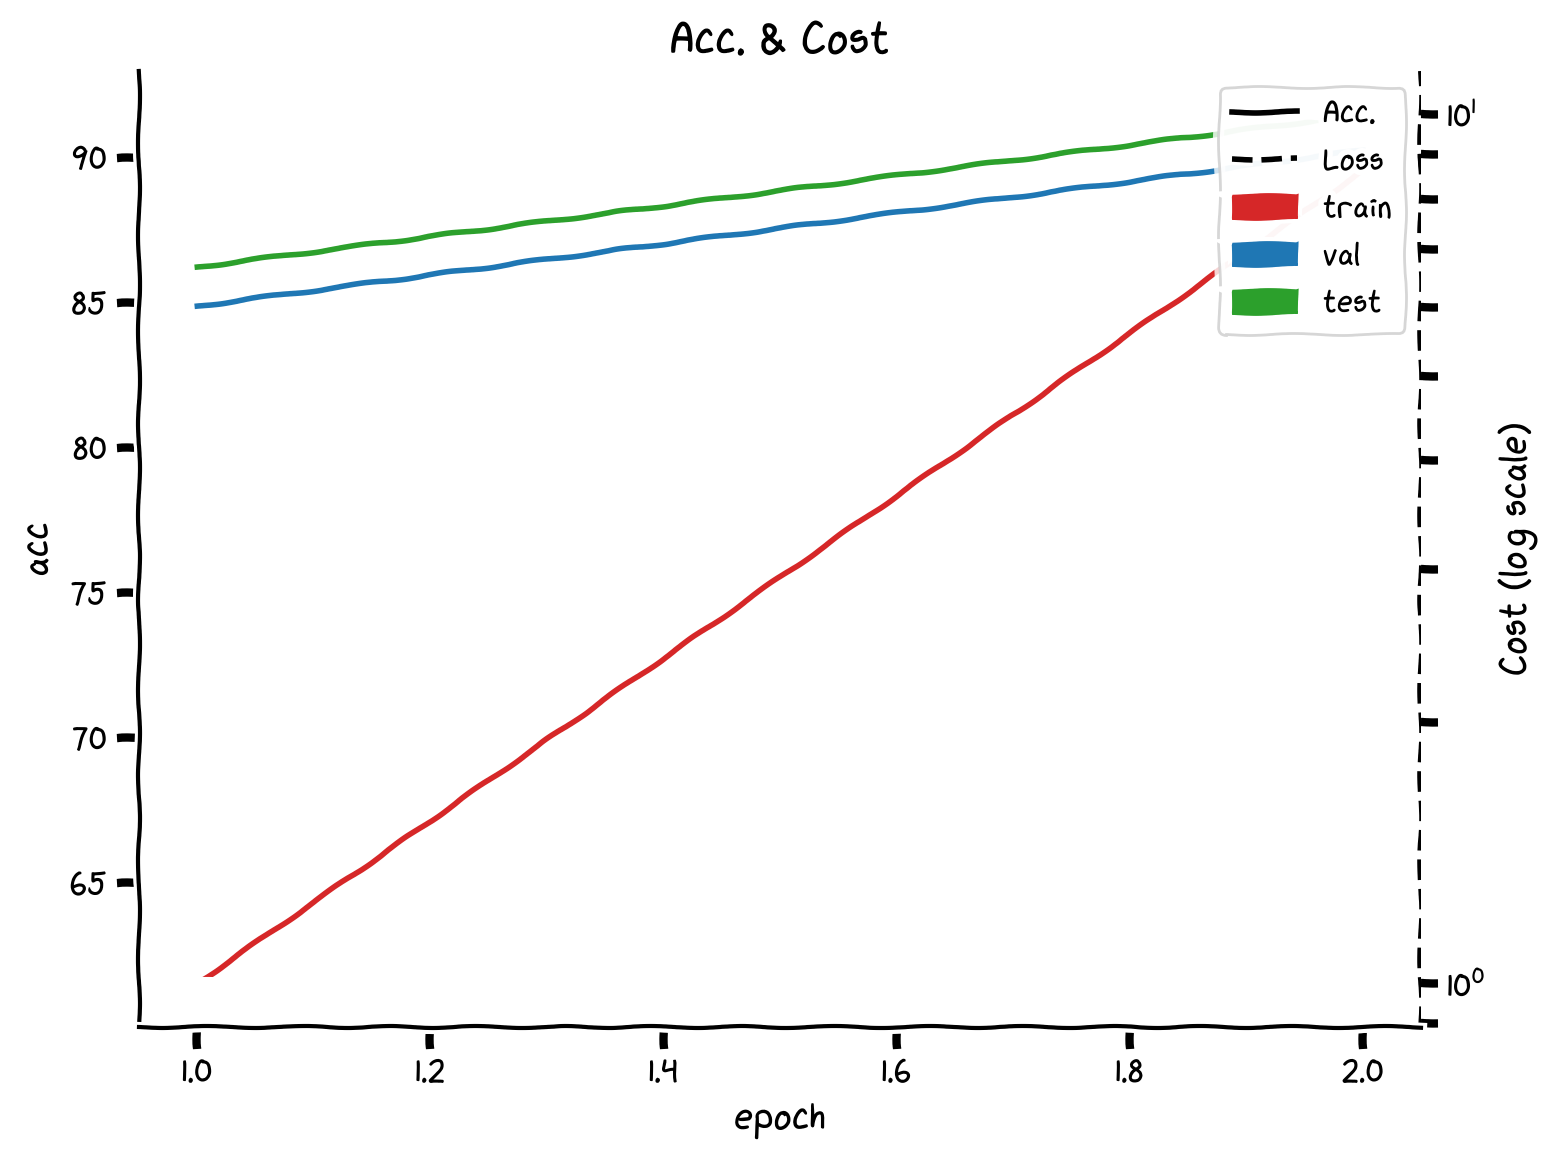

In [6]:
# log_file_name = ''
plot_single(log_file_name, _show=True, _save=False)

# Run the varying datapoints experiment

## For MLP with BP

In [7]:
_cmd = 'python main.py --c_energy cross_entropy --seed 2019 --epochs 10 --summary-writer'
log_file_name = ipynb_main(_argv=_cmd.split(' ')[1:], exp=vd_run_exp)
print(log_file_name)

[INFO  2024/07/20 - 21:01:14(UTC)] Cmd: python main.py --c_energy cross_entropy --seed 2019 --epochs 10 --summary-writer
[INFO  2024/07/20 - 21:01:14(UTC)] Device:
cuda:0
[INFO  2024/07/20 - 21:01:14(UTC)] Start training with parametrization:
{
    "batch_size": 100,
    "beta": 1,
    "c_energy": "cross_entropy",
    "dataset": "mnist",
    "dimensions": [
        784,
        1000,
        10
    ],
    "early_stopping": false,
    "energy": null,
    "epochs": 10,
    "learning_rate": 0.001,
    "log_dir": "",
    "nonlinearity": "sigmoid",
    "optimizer": "adam",
    "seed": 2019,
    "summary_writer": true
}
[INFO  2024/07/20 - 21:01:14(UTC)] [ Running training of model for: N=10 ]
[INFO  2024/07/20 - 21:01:14(UTC)] [0/54000 (0%)]	Loss: 2.337928
[INFO  2024/07/20 - 21:01:14(UTC)] Epoch Finished: Avg. Loss: 2.3379, Accuracy: 0.00%
[INFO  2024/07/20 - 21:01:14(UTC)] Test Set: Avg. Loss: 2.3294, Accuracy: 16.67%
[INFO  2024/07/20 - 21:01:14(UTC)] epoch: 1 	 VAL val_acc: 16.6667 	 me

20240720_2101_bp_cross_entropy_mnist


Visualize the results of the `vd_run_exp` experiment that you ran above

Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.


{'10': (2.271954298019409, 2.2520599365234375, 2.207484483718872, 2.1694908142089844, 2.145071268081665, 2.131293535232544, 2.1263391971588135, 2.129462480545044, 2.137155055999756, 2.136894941329956), '100': (2.1507341861724854, 2.00905704498291, 1.90415358543396, 1.8521547317504883, 1.8210182189941406, 1.7946014404296875, 1.7720385789871216, 1.758997917175293, 1.7569249868392944, 1.7598986625671387), '1000': (1.707318663597107, 1.6434996128082275, 1.6221634149551392, 1.6193335056304932, 1.6064379215240479, 1.603999376296997, 1.5978989601135254, 1.5960832834243774, 1.5986844301223755, 1.595383644104004), '10000': (1.5836563110351562, 1.5763376951217651, 1.5669970512390137, 1.5615195035934448, 1.558820366859436, 1.5662130117416382, 1.566780686378479, 1.5597481727600098, 1.5707372426986694, 1.5619431734085083)}


Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\\times' [U+d7], substitutin

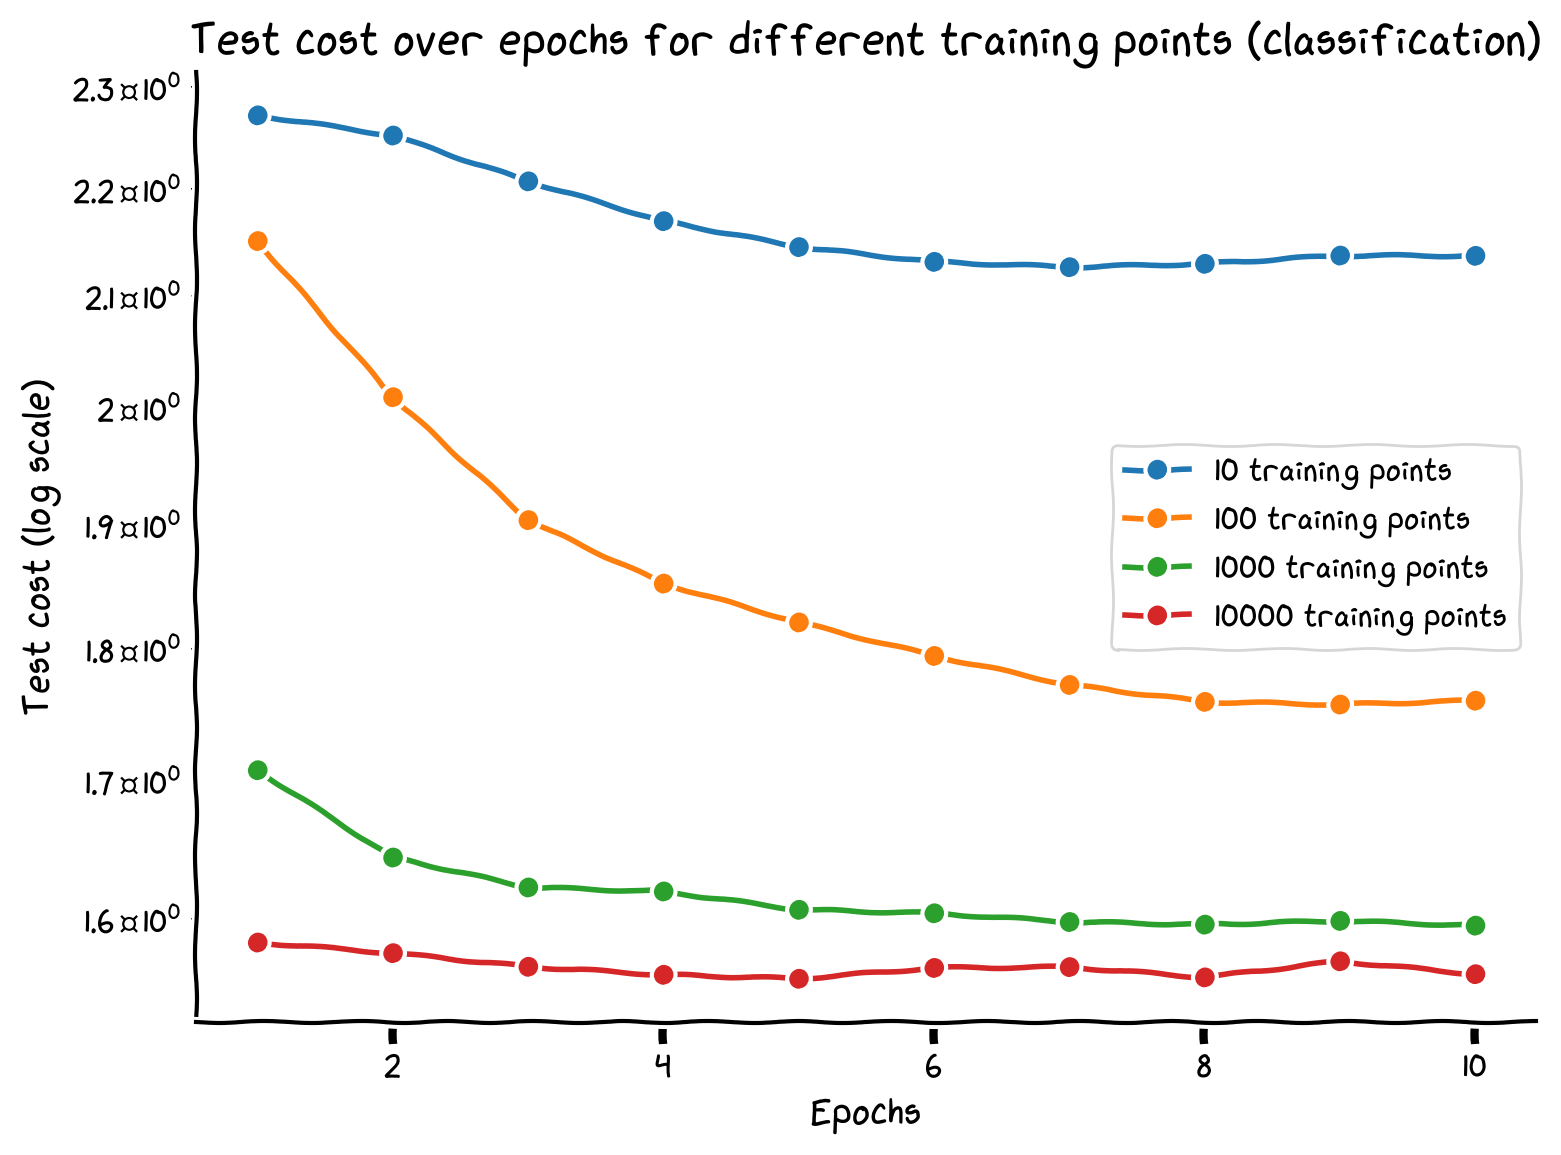

In [12]:
log_file_name = ''
vd_read_exp_data(file_glob=log_file_name, scalar_tag='test_loss', _show=True, _save=False)

## For `cond_gaussian`

In [10]:
_cmd = 'python main.py --energy cond_gaussian --c_energy cross_entropy --seed 2019 --epochs 10 --summary-writer'
log_file_name = ipynb_main(_argv=_cmd.split(' ')[1:], exp=vd_run_exp)
print(log_file_name)

[INFO  2024/07/23 - 02:25:16(UTC)] Cmd: python main.py --energy cond_gaussian --c_energy cross_entropy --seed 2019 --epochs 10 --summary-writer
[INFO  2024/07/23 - 02:25:16(UTC)] Device:
cpu
[INFO  2024/07/23 - 02:25:16(UTC)] Start training with parametrization:
{
    "batch_size": 100,
    "beta": 1,
    "c_energy": "cross_entropy",
    "dataset": "mnist",
    "dimensions": [
        784,
        1000,
        10
    ],
    "dynamics": {
        "dt": 0.1,
        "n_relax": 50,
        "tau": 1,
        "tol": 0
    },
    "early_stopping": false,
    "energy": "cond_gaussian",
    "epochs": 10,
    "fast_ff_init": true,
    "learning_rate": 0.001,
    "log_dir": "",
    "nonlinearity": "sigmoid",
    "optimizer": "adam",
    "seed": 2019,
    "summary_writer": true
}
[INFO  2024/07/23 - 02:25:16(UTC)] [ Running training of model for: N=10 ]
[INFO  2024/07/23 - 02:25:16(UTC)] 0%:	E: 0.00	dE -2.11	batch_acc 0.7000
[INFO  2024/07/23 - 02:25:16(UTC)] Epoch Finished: Avg. Loss: 0.0000, A

20240723_0225_cond_gaussian


Visualize the results of the `vd_run_exp` experiment that you ran above

{'10': (22.260000228881836, 26.479999542236328, 25.760000228881836, 27.270000457763672, 30.6299991607666, 32.9900016784668, 33.9900016784668, 34.11000061035156, 34.06999969482422, 33.689998626708984), '100': (27.260000228881836, 51.40999984741211, 59.900001525878906, 65.70999908447266, 67.54000091552734, 68.29000091552734, 68.13999938964844, 67.12000274658203, 66.83999633789062, 67.36000061035156), '1000': (70.29000091552734, 80.6500015258789, 84.47000122070312, 86.56999969482422, 87.51000213623047, 87.66999816894531, 88.2699966430664, 88.37000274658203, 88.9800033569336, 88.6500015258789), '10000': (89.88999938964844, 91.58999633789062, 92.30000305175781, 93.20999908447266, 93.37000274658203, 94.30000305175781, 94.23999786376953, 94.55000305175781, 94.63999938964844, 95.04000091552734)}


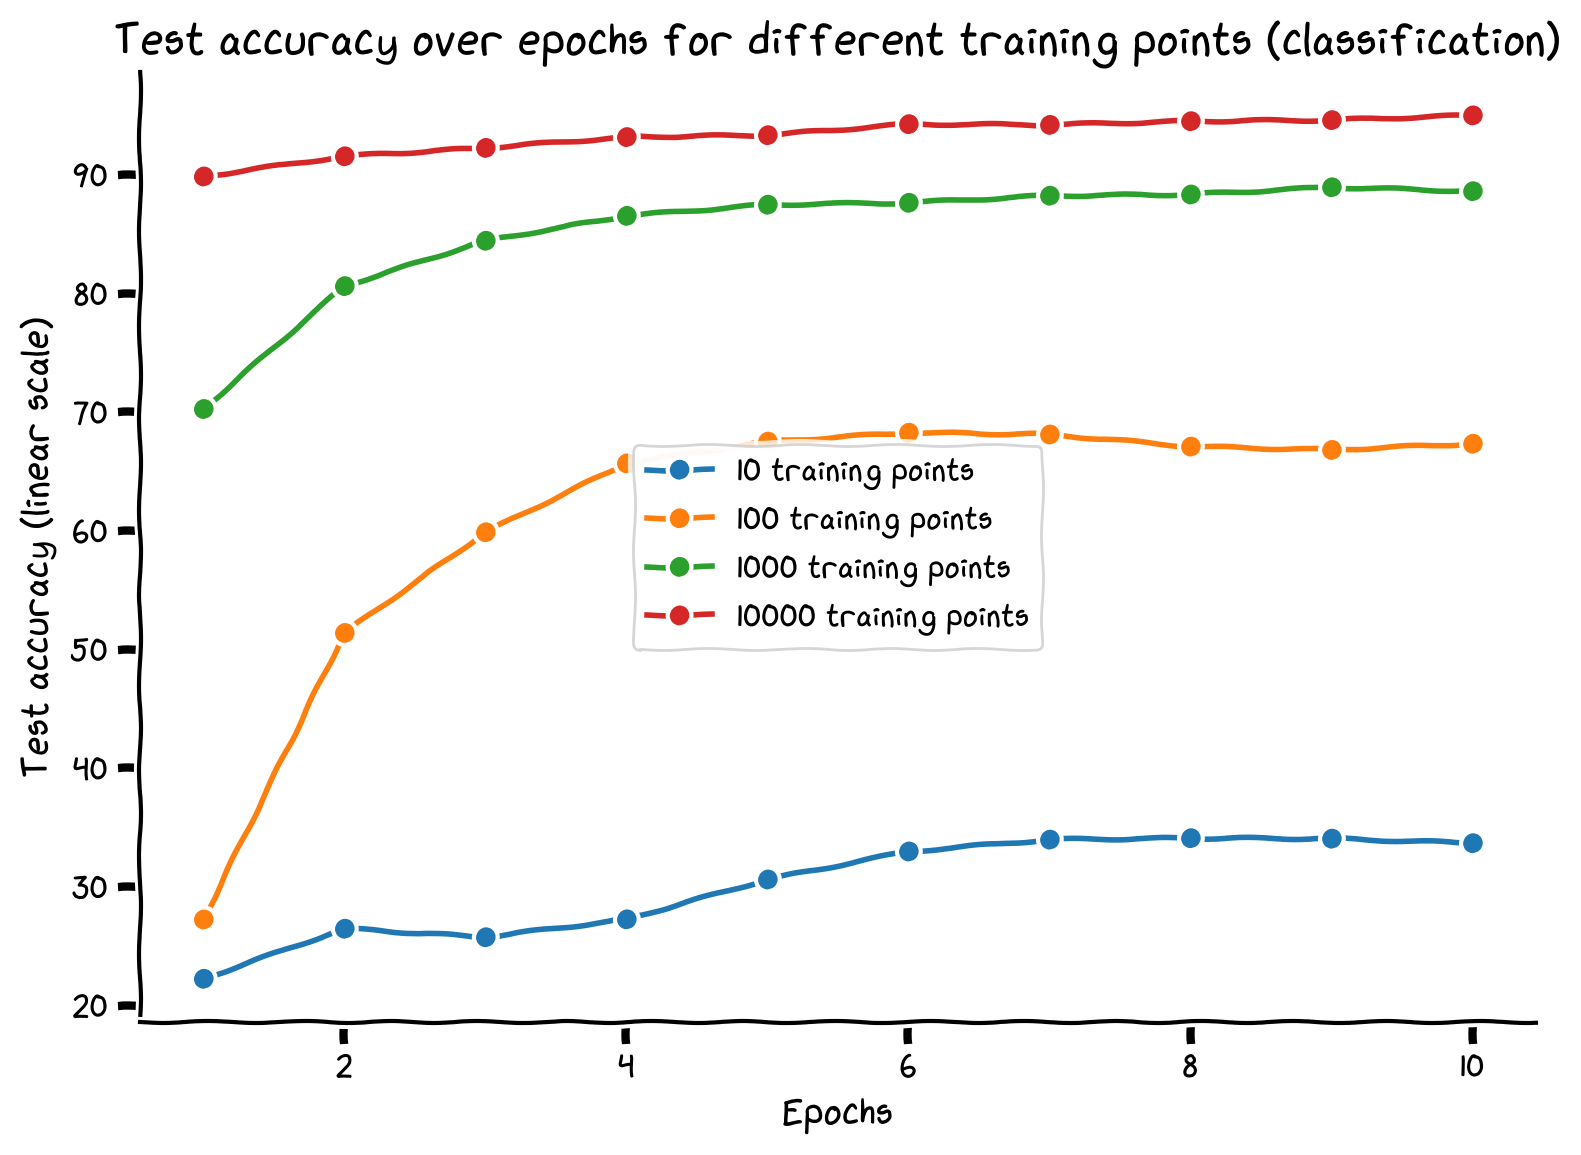

In [10]:
log_file_name = ''
vd_read_exp_data(file_glob=log_file_name, scalar_tag='test_acc', _show=True, _save=False)

## For `restr_hopfield`

In [7]:
_cmd = 'python main.py --energy restr_hopfield --c_energy cross_entropy --seed 2019 --epochs 10 --summary-writer'
log_file_name = ipynb_main(_argv=_cmd.split(' ')[1:], exp=vd_run_exp)
print(log_file_name)

[INFO  2024/07/20 - 21:10:07(UTC)] Cmd: python main.py --energy restr_hopfield --c_energy cross_entropy --seed 2019 --epochs 10 --summary-writer
[INFO  2024/07/20 - 21:10:07(UTC)] Device:
cuda:0
[INFO  2024/07/20 - 21:10:07(UTC)] Start training with parametrization:
{
    "batch_size": 100,
    "beta": 1,
    "c_energy": "cross_entropy",
    "dataset": "mnist",
    "dimensions": [
        784,
        1000,
        10
    ],
    "dynamics": {
        "dt": 0.1,
        "n_relax": 50,
        "tau": 1,
        "tol": 0
    },
    "early_stopping": false,
    "energy": "restr_hopfield",
    "epochs": 10,
    "fast_ff_init": false,
    "learning_rate": 0.001,
    "log_dir": "",
    "nonlinearity": "sigmoid",
    "optimizer": "adam",
    "seed": 2019,
    "summary_writer": true
}
[INFO  2024/07/20 - 21:10:07(UTC)] [ Running training of model for: N=10 ]
[INFO  2024/07/20 - 21:10:08(UTC)] 0%:	E: 426.88	dE -4.14	batch_acc 0.1000
[INFO  2024/07/20 - 21:10:08(UTC)] Epoch Finished: Avg. Loss: 4

20240720_2110_restr_hopfield


Visualize the results of the `vd_run_exp` experiment that you ran above

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


{'10': (385.007080078125, 379.0281982421875, 368.53662109375, 355.0871276855469, 336.1353454589844, 314.1968688964844, 290.8798828125, 264.7128601074219, 236.16114807128906, 204.9917449951172), '100': (371.12799072265625, 357.7200927734375, 342.0793762207031, 322.2886962890625, 297.94256591796875, 268.1751708984375, 233.3032684326172, 193.41168212890625, 148.6165313720703, 99.3714828491211), '1000': (132.86317443847656, -462.8377685546875, -977.1050415039062, -1295.0572509765625, -1479.8553466796875, -1591.9693603515625, -1670.135009765625, -1730.282470703125, -1779.7015380859375, -1823.4697265625), '10000': (-1832.760986328125, -2296.55908203125, -2999.9560546875, -3549.02880859375, -3971.71826171875, -4324.41064453125, -4613.1015625, -4863.46337890625, -5091.30859375, -5305.6884765625)}


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

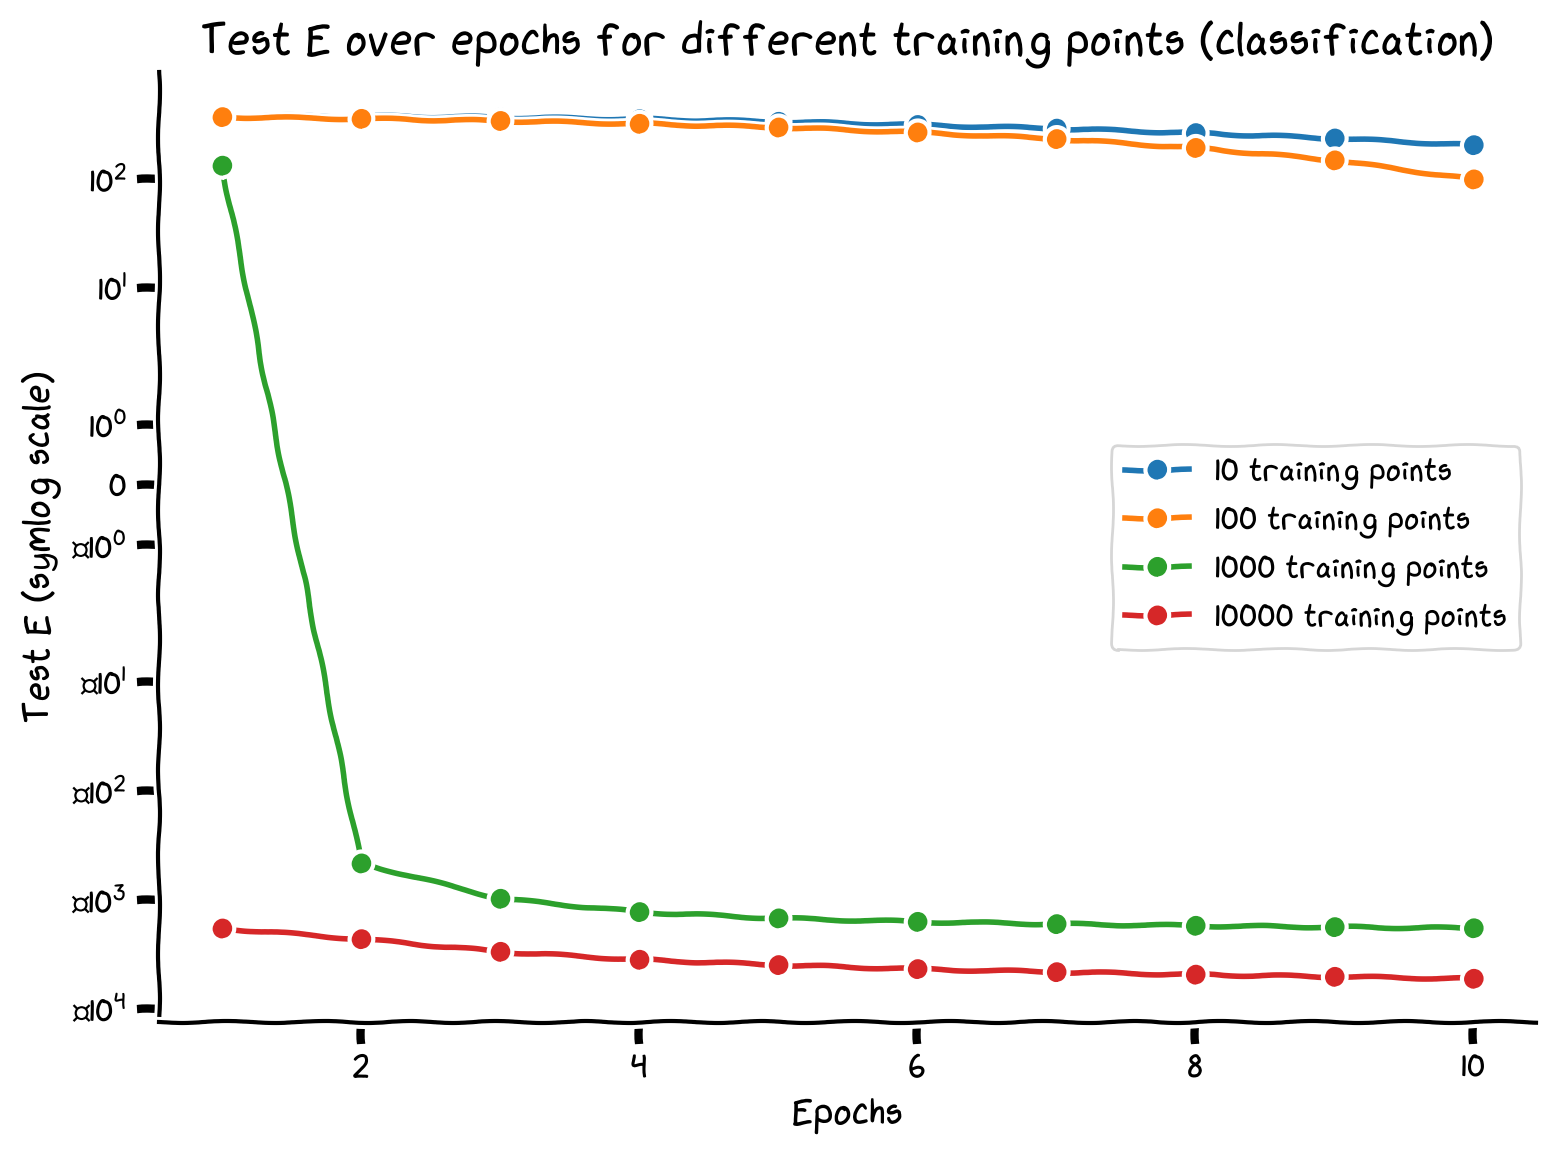

In [11]:
log_file_name = ''
vd_read_exp_data(file_glob=log_file_name, scalar_tag='test_E', _show=True, _save=False)

## For all (test acc.)

{'BP': {'10': (24.780000686645508, 27.56999969482422, 28.899999618530273, 30.010000228881836, 31.899999618530273, 33.45000076293945, 34.47999954223633, 35.25, 35.189998626708984, 35.150001525878906), '100': (41.59000015258789, 54.560001373291016, 66.75, 70.97000122070312, 73.01000213623047, 72.7300033569336, 72.69000244140625, 72.5199966430664, 72.0199966430664, 71.80000305175781), '1000': (79.8499984741211, 82.06999969482422, 85.58999633789062, 84.58999633789062, 86.62000274658203, 87.20999908447266, 87.43000030517578, 87.80999755859375, 86.91000366210938, 87.9000015258789), '10000': (88.54000091552734, 88.13999938964844, 89.70999908447266, 89.98999786376953, 90.08999633789062, 89.83999633789062, 89.2699966430664, 89.87000274658203, 89.18000030517578, 89.80999755859375)}, 'EP-CG': {'10': (22.260000228881836, 26.479999542236328, 25.760000228881836, 27.270000457763672, 30.6299991607666, 32.9900016784668, 33.9900016784668, 34.11000061035156, 34.06999969482422, 33.689998626708984), '100':

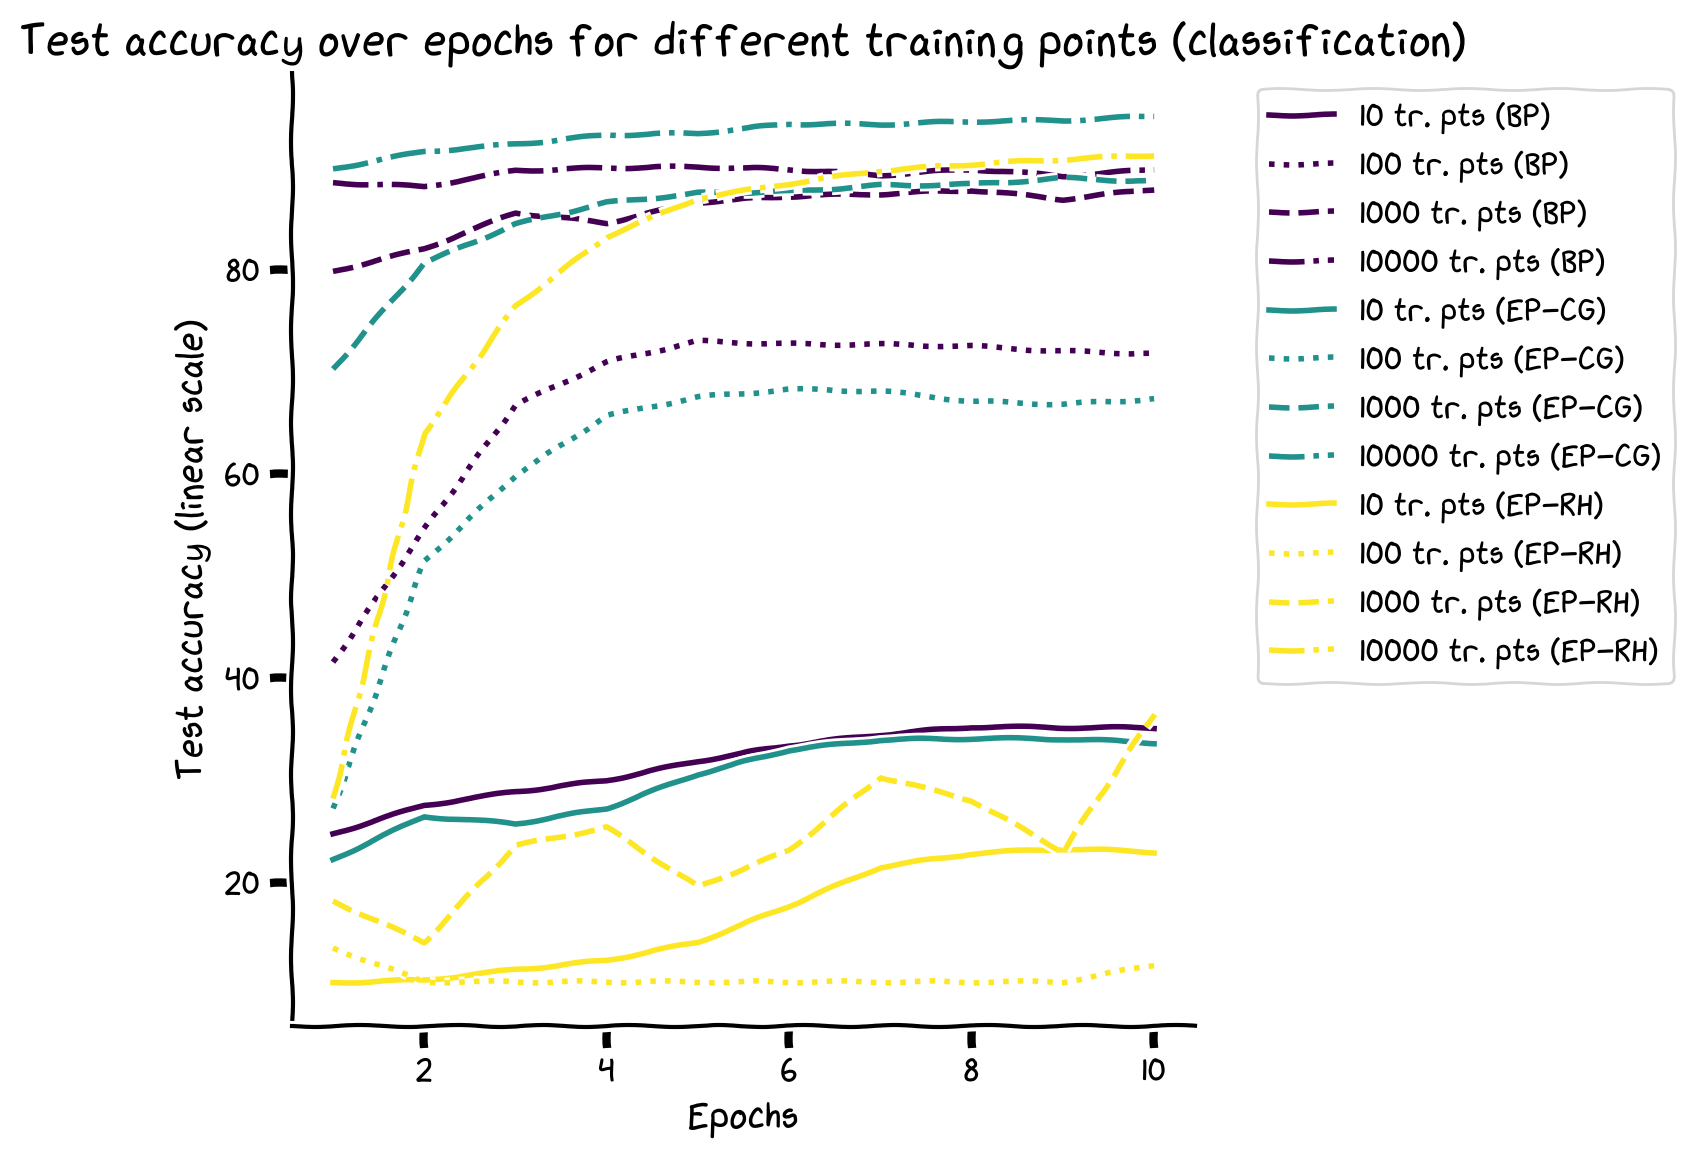

In [12]:
_file_globs = ('20240720_2101_bp_cross_entropy_mnist', '20240720_2107_cond_gaussian', '20240720_2110_restr_hopfield')
# _file_globs = ('20240720_2101_bp_cross_entropy_mnist', '20240723_0225_cond_gaussian', '20240720_2110_restr_hopfield') # Same n_relax
_names = ('BP','EP-CG','EP-RH')
read_N_plot_multi_exp_data(_file_globs, 'test_acc', _names, _show=True, _save=False, _fig_name=None)

{'BP': {'10': (24.780000686645508, 27.56999969482422, 28.899999618530273, 30.010000228881836, 31.899999618530273, 33.45000076293945, 34.47999954223633, 35.25, 35.189998626708984, 35.150001525878906), '100': (41.59000015258789, 54.560001373291016, 66.75, 70.97000122070312, 73.01000213623047, 72.7300033569336, 72.69000244140625, 72.5199966430664, 72.0199966430664, 71.80000305175781), '1000': (79.8499984741211, 82.06999969482422, 85.58999633789062, 84.58999633789062, 86.62000274658203, 87.20999908447266, 87.43000030517578, 87.80999755859375, 86.91000366210938, 87.9000015258789), '10000': (88.54000091552734, 88.13999938964844, 89.70999908447266, 89.98999786376953, 90.08999633789062, 89.83999633789062, 89.2699966430664, 89.87000274658203, 89.18000030517578, 89.80999755859375)}, 'EP-CG': {'10': (19.209999084472656, 21.59000015258789, 22.700000762939453, 23.639999389648438, 27.049999237060547, 29.360000610351562, 30.350000381469727, 30.299999237060547, 29.84000015258789, 29.459999084472656), 

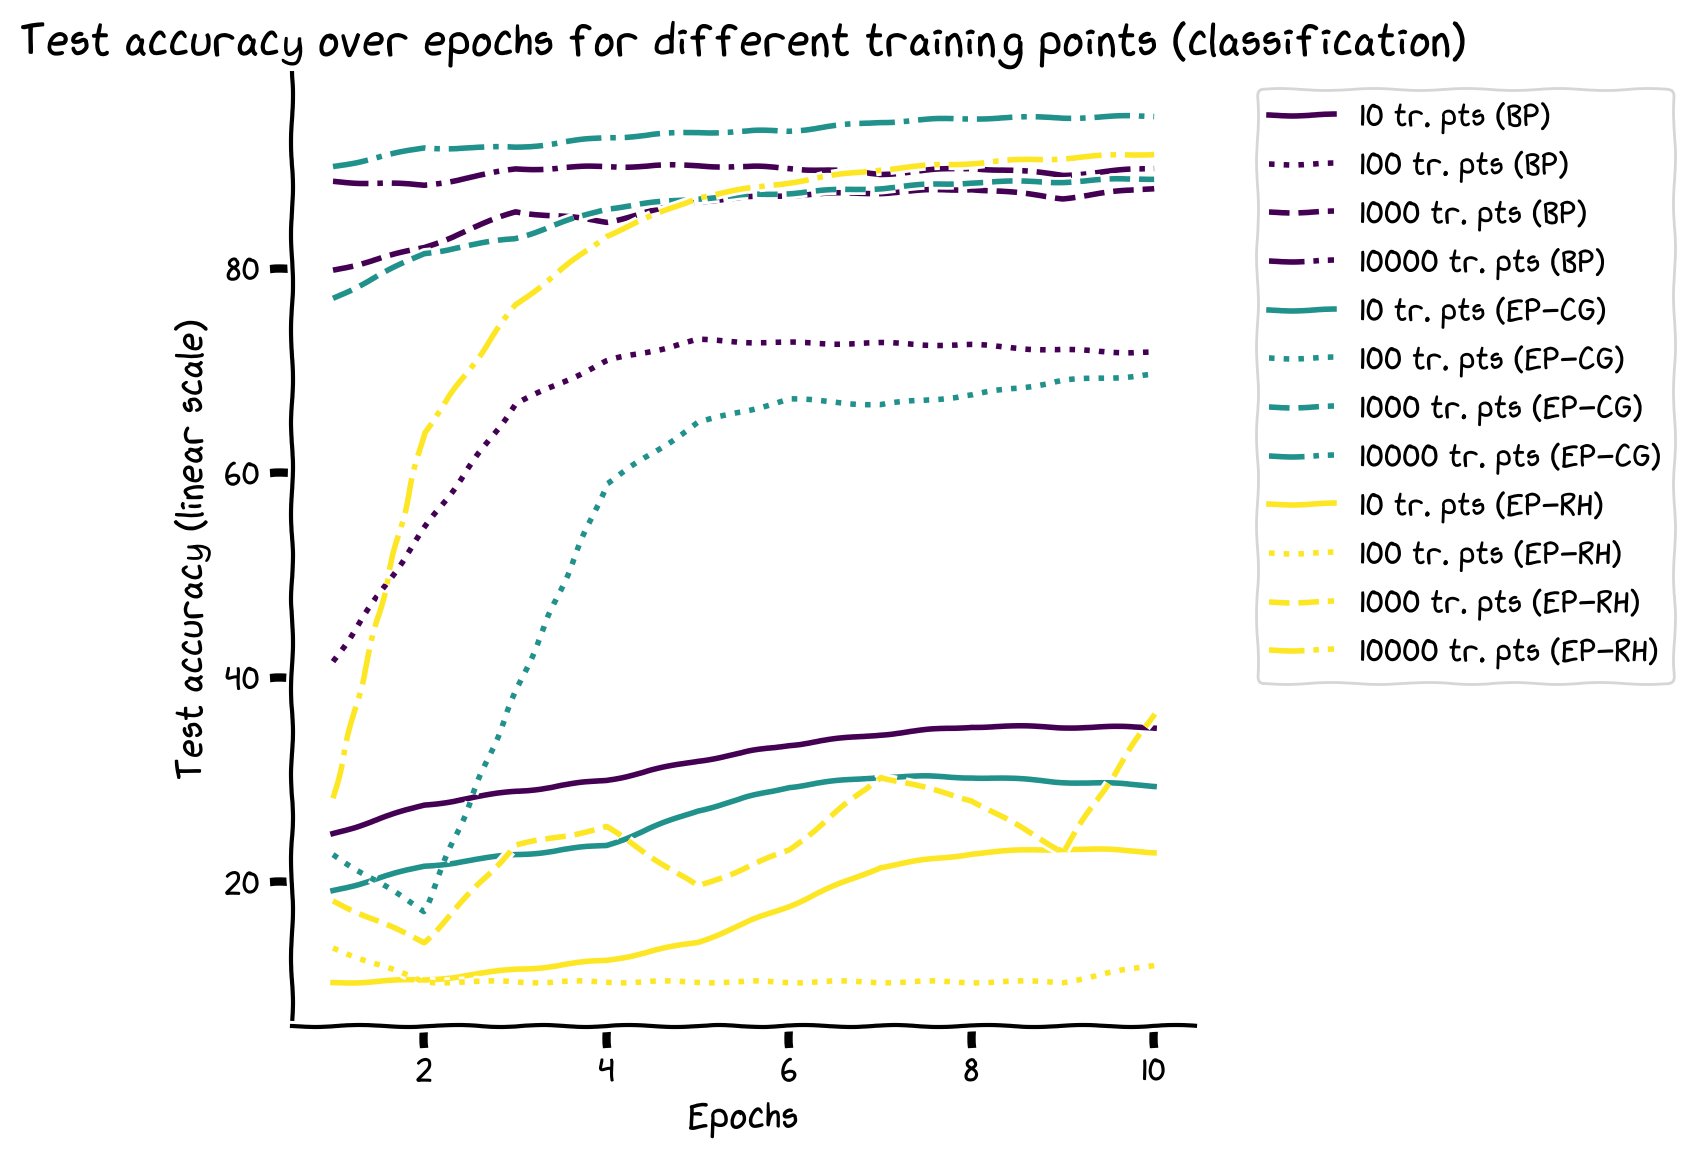

In [13]:
# _file_globs = ('20240720_2101_bp_cross_entropy_mnist', '20240720_2107_cond_gaussian', '20240720_2110_restr_hopfield')
_file_globs = ('20240720_2101_bp_cross_entropy_mnist', '20240723_0225_cond_gaussian', '20240720_2110_restr_hopfield') # Same n_relax
_names = ('BP','EP-CG','EP-RH')
read_N_plot_multi_exp_data(_file_globs, 'test_acc', _names, _show=True, _save=False, _fig_name=None)